# ***Assignment 3: Churning_Customers***

## **Importing Relivant Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout
from keras.models import Model
from keras.layers import Input, Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
import pickle

# **Installing Required Library**

In [2]:
!pip install scikeras

# **Mounting and Loading Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [6]:
pd.options.display.max_columns = None

In [15]:
Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Dropping Irrelivant Data**

In [7]:
Contributing_Features = Data.drop('customerID', axis =1)

In [17]:
Contributing_Features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Removing attributes with more than 30 % null values**

In [8]:

Condition = 0.7 * len(Contributing_Features)
Filtered_Data = Contributing_Features.dropna(thresh = Condition, axis=1)

# **Checking if there are still other null values**

In [9]:
nan_values = Filtered_Data.isna().any()

print (nan_values)

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


# **Encoding Non-Numeric columns**

In [10]:
To_be_Encoded = ['gender',	'Partner',	'Dependents', 'PhoneService',	'MultipleLines',	'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod', 'Churn', 'TotalCharges']

In [11]:
for non_numeric_attribute in To_be_Encoded:
  Filtered_Data[non_numeric_attribute],_=pd.factorize(Filtered_Data[non_numeric_attribute])

In [22]:
Filtered_Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,6526,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,6527,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,6528,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,6529,1


# **Extracting dependent variable(X) and indepent variable(Y)**

In [12]:
Y_feature = pd.DataFrame(Filtered_Data['Churn'], columns= ['Churn'])

In [13]:
X_features  = Filtered_Data.drop('Churn', axis= 1)

In [14]:
Attribut = Filtered_Data.columns

In [26]:
Attribut

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# **Extracting Feature importance**

In [18]:
from xgboost.sklearn import XGBRFClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot


# fit model training data
model = XGBClassifier()
model.fit(X_features, Y_feature)
# feature importance
importances = model.feature_importances_


# Print or use feature importances
sorted_indices = np.argsort(importances)[::-1]
for index in sorted_indices:
   print(f"'{Attribut[index]}', '{importances[index]}'")
   print()

'Contract', '0.4509020149707794'

'InternetService', '0.09725093841552734'

'OnlineSecurity', '0.08094794303178787'

'TechSupport', '0.05162568762898445'

'PhoneService', '0.030325906351208687'

'tenure', '0.029199782758951187'

'PaymentMethod', '0.023129157721996307'

'PaperlessBilling', '0.02312660776078701'

'OnlineBackup', '0.023000439628958702'

'MonthlyCharges', '0.022509746253490448'

'StreamingMovies', '0.020993707701563835'

'SeniorCitizen', '0.020993081852793694'

'Dependents', '0.020868439227342606'

'TotalCharges', '0.018862636759877205'

'MultipleLines', '0.018603181466460228'

'Partner', '0.01727401278913021'

'DeviceProtection', '0.01713399589061737'

'StreamingTV', '0.017022093757987022'

'gender', '0.016230646520853043'



# **Ploting Feature Importance**

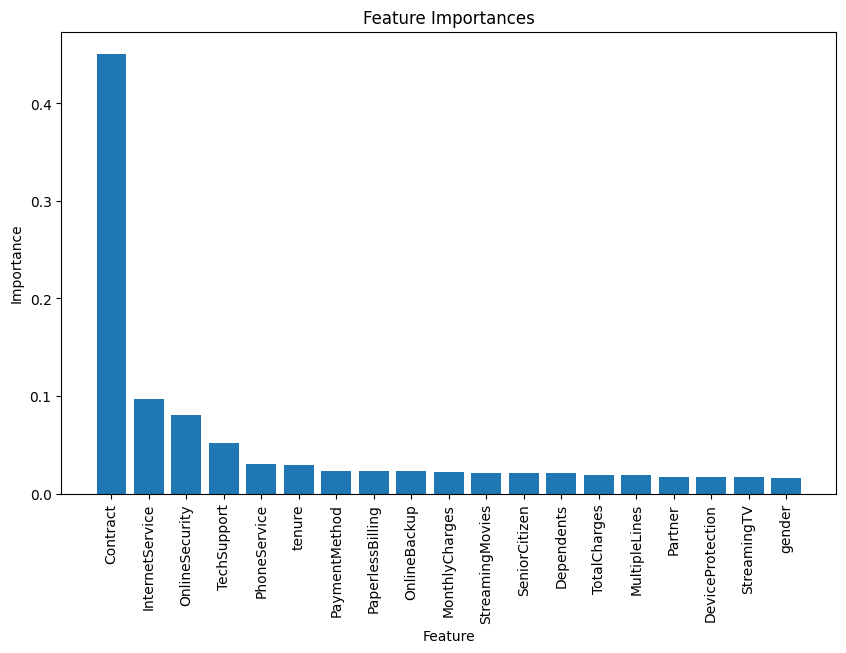

In [19]:
# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_features.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_features.shape[1]), Attribut[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# **Resetting Y variable and Scalling the X values**

In [20]:
final_Y_feature = Y_feature

In [21]:
from re import X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_features)
final_X_feaures = pd.DataFrame(scaler.transform(X_features), columns=  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges',])



In [49]:
final_X_feaures

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,0.0,0.013889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.115423,0.000000
1,1.0,0.0,1.0,0.0,0.472222,1.0,0.5,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,1.0,0.333333,0.385075,0.000153
2,1.0,0.0,1.0,0.0,0.027778,1.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.354229,0.000306
3,1.0,0.0,1.0,0.0,0.625000,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,1.0,0.666667,0.239303,0.000459
4,0.0,0.0,1.0,0.0,0.027778,1.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.521891,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.333333,0.662189,0.999387
7039,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,0.5,0.0,0.0,0.5,0.0,0.5,0.5,0.5,0.0,1.000000,0.845274,0.999541
7040,0.0,0.0,0.0,1.0,0.152778,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.112935,0.999694
7041,1.0,1.0,0.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.558706,0.999847


# **Spliting data for training, validation, and testing**

In [22]:
Xtrain,X,Ytrain,Y=train_test_split(final_X_feaures,final_Y_feature,test_size=0.2,random_state=42,stratify=final_Y_feature)

Xvalidate,Xtest,Yvalidate,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)



In [34]:
Ytest

,Churn
5430,1
5400,0
888,0
4627,0
4666,0
...,...
4674,0
680,1
3701,0
2168,1


# **Building and Training Model First Model**




Epoch 1/4
177/177 [==============================] - 2s 5ms/step - loss: 0.5743 - accuracy: 0.7283 - val_loss: 0.4918 - val_accuracy: 0.7347
Epoch 2/4
177/177 [==============================] - 1s 6ms/step - loss: 0.4808 - accuracy: 0.7341 - val_loss: 0.4500 - val_accuracy: 0.7347
Epoch 3/4
177/177 [==============================] - 1s 6ms/step - loss: 0.4685 - accuracy: 0.7680 - val_loss: 0.4442 - val_accuracy: 0.7897
Epoch 4/4
9/9 [==============================] - 0s 3ms/step
Accuracy: 0.776595744680851
AUC Score: 0.8184863123993559


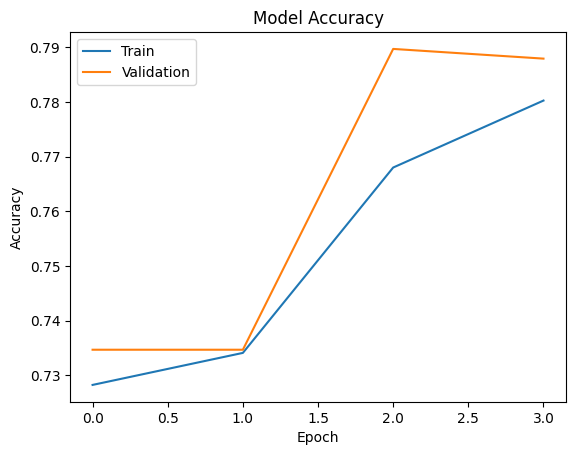

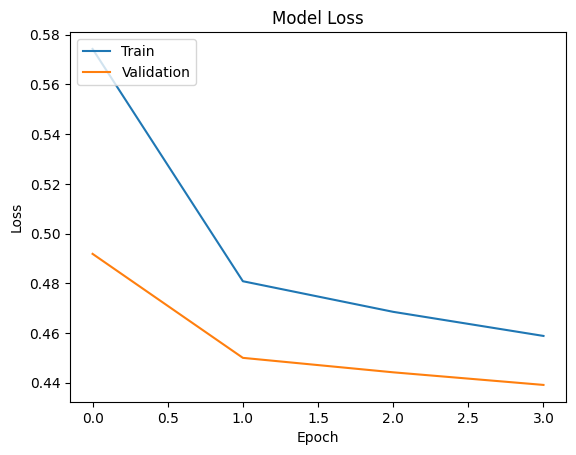

In [39]:


# Defining input layer
input_layer = Input(shape=(19,))  # Replace input_dim with the number of features

# Defining hidden layers
hidden1 = Dense(50, activation='relu')(input_layer)
dropout1 = Dropout(0.1)(hidden1)
hidden2 = Dense(30, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(hidden2)
hidden3 = Dense(30, activation='relu')(dropout2)
dropout3 = Dropout(0.1)(hidden3)
hidden4 = Dense(30, activation='relu')(dropout3)
dropout4 = Dropout(0.1)(hidden4)
hidden5 = Dense(30, activation='relu')(dropout4)
dropout5 = Dropout(0.1)(hidden5)
hidden6 = Dense(30, activation='relu')(dropout5)
dropout6 = Dropout(0.1)(hidden6)
hidden7 = Dense(30, activation='relu')(dropout6)
dropout7 = Dropout(0.1)(hidden7)
hidden8 = Dense(10, activation='relu')(dropout7)
dropout8 = Dropout(0.1)(hidden8)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dropout8)

# The model
model = Model(inputs=input_layer, outputs=output_layer)

optimizer = SGD(momentum = 0.9)
# Compiling model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(Xtrain, Ytrain, epochs=4, batch_size=32, validation_data=(Xvalidate, Yvalidate))


# Making prediction on the test set and calculate accuracy and AUC score
Ypred = model.predict(Xtest)
accuracy = accuracy_score(Ytest, (Ypred > 0.5).astype(int))
auc_score = roc_auc_score(Ytest, Ypred)
Ypred
print("Accuracy:", accuracy)
print("AUC Score:", auc_score)


# Ploting training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Ploting training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Building Grid search to find optimal Parameters**

In [43]:

#Function to create model
def create_model(neurons=30):
    input_layer = Input(shape=(19,))
    hidden1 = Dense(neurons, activation='relu')(input_layer)
    dropout1 = Dropout(0.2)(hidden1)
    hidden2 = Dense(neurons, activation='relu')(dropout1)
    dropout2 = Dropout(0.2)(hidden2)
    hidden3 = Dense(neurons, activation='relu')(dropout2)
    dropout3 = Dropout(0.2)(hidden3)
    hidden4 = Dense(neurons, activation='relu')(dropout3)
    dropout4 = Dropout(0.2)(hidden4)
    hidden5 = Dense(neurons, activation='relu')(dropout4)
    dropout5 = Dropout(0.2)(hidden5)
    hidden6 = Dense(neurons, activation='relu')(dropout5)
    dropout6 = Dropout(0.2)(hidden6)
    output_layer = Dense(1, activation='sigmoid')(dropout6)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wraping the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, neurons=30, epochs=10, batch_size=10, verbose=0)

# Defining the grid search parameters
param_grid = {
    'neurons': [10, 20],
    'batch_size': [10, 20,],
    'epochs': [10, 20, 30],
    'optimizer': ['Adam'],
    # 'activation': ['ReLU', 'Leaky ReLU', 'Tanh', 'Swish']
}

# Creating GridSearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(Xtrain, Ytrain)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [41]:
# Make predictions on the test set with the best model
best_model = grid_result.best_estimator_
Ypred = best_model.predict(Xtest)
accuracy = accuracy_score(Ytest, (Ypred > 0.5).astype(int))
auc_score = roc_auc_score(Ytest, Ypred)

print("Accuracy:", accuracy)
print("AUC Score:", auc_score)

# Print the best parameters and best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Accuracy: 0.7801418439716312
AUC Score: 0.6801932367149759
Best: 0.804224 using {'batch_size': 10, 'epochs': 20, 'neurons': 10, 'optimizer': 'Adam'}


# **Building and training Second(chosen) model based on Grid search results**

In [42]:
# Defining input layer
input_layer = Input(shape=(19,))

# Defining hidden layers
hidden1 = Dense(20, activation='relu')(input_layer)
dropout1 = Dropout(0.1)(hidden1)
hidden2 = Dense(20, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden2)
hidden3 = Dense(20, activation='relu')(dropout2)
dropout3 = Dropout(0.2)(hidden3)
hidden4 = Dense(20, activation='relu')(dropout3)
dropout4 = Dropout(0.2)(hidden4)


# Defining output layer
output_layer = Dense(1, activation='sigmoid')(dropout4)

# Creating the model
model = Model(inputs=input_layer, outputs=output_layer)

optimizer = 'Adam'
# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history= model.fit(Xtrain, Ytrain, epochs=20, batch_size=20, validation_data=(Xvalidate, Yvalidate))








Epoch 1/20
282/282 [==============================] - 6s 8ms/step - loss: 0.5363 - accuracy: 0.7155 - val_loss: 0.4741 - val_accuracy: 0.7711
Epoch 2/20
282/282 [==============================] - 2s 6ms/step - loss: 0.4636 - accuracy: 0.7694 - val_loss: 0.4523 - val_accuracy: 0.7693
Epoch 3/20
282/282 [==============================] - 2s 7ms/step - loss: 0.4520 - accuracy: 0.7758 - val_loss: 0.4401 - val_accuracy: 0.7782
Epoch 4/20
282/282 [==============================] - 2s 7ms/step - loss: 0.4474 - accuracy: 0.7861 - val_loss: 0.4380 - val_accuracy: 0.7879
Epoch 5/20
282/282 [==============================] - 2s 7ms/step - loss: 0.4409 - accuracy: 0.7906 - val_loss: 0.4391 - val_accuracy: 0.7844
Epoch 6/20
282/282 [==============================] - 3s 10ms/step - loss: 0.4357 - accuracy: 0.7985 - val_loss: 0.4273 - val_accuracy: 0.8066
Epoch 7/20
282/282 [==============================] - 3s 10ms/step - loss: 0.4322 - accuracy: 0.7959 - val_loss: 0.4277 - val_accuracy: 0.7977
Epoc

# **Predictions on the test set and calculating of accuracy and AUC score**

In [37]:
# Make predictions on the test set and calculate accuracy and AUC score
Ypred = model.predict(Xtest)
accuracy = accuracy_score(Ytest, (Ypred > 0.5).astype(int))
auc_score = roc_auc_score(Ytest, Ypred)
Ypred
print("Accuracy:", accuracy)
print("AUC Score:", auc_score)

9/9 [==============================] - 0s 3ms/step
Accuracy: 0.7801418439716312
AUC Score: 0.8302737520128824


In [58]:
Ypred

array([[0.42949802],
       [0.3174966 ],
       [0.23422036],
       [0.16291344],
       [0.08217239],
       [0.01377991],
       [0.12534158],
       [0.00973069],
       [0.39268818],
       [0.542     ],
       [0.37949827],
       [0.08103883],
       [0.6991705 ],
       [0.05600793],
       [0.6967244 ],
       [0.65083086],
       [0.68221444],
       [0.20124191],
       [0.1185396 ],
       [0.36319736],
       [0.07560795],
       [0.22429729],
       [0.07090013],
       [0.0869731 ],
       [0.75068516],
       [0.23206368],
       [0.04177384],
       [0.36136696],
       [0.5048448 ],
       [0.27998763],
       [0.8146748 ],
       [0.27048135],
       [0.77261215],
       [0.03139105],
       [0.56593764],
       [0.23721349],
       [0.7383859 ],
       [0.83645505],
       [0.21720774],
       [0.02863291],
       [0.17477635],
       [0.6373966 ],
       [0.03322874],
       [0.24783108],
       [0.39465052],
       [0.06490549],
       [0.15566276],
       [0.083

# **Saving the chosen model**

In [56]:
with open('churn_model.sav', 'wb') as model_file:
    pickle.dump(model, model_file)

# **Ploting training & validation accuracy and training & validation loss for the chosen model**

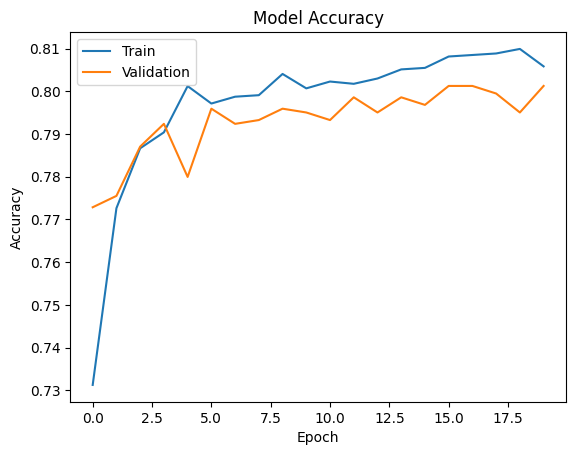

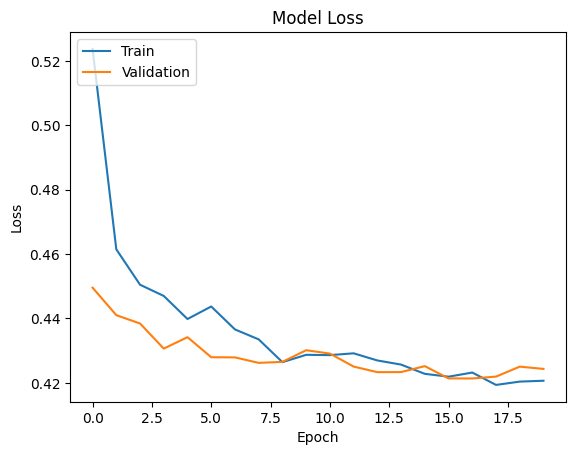

In [38]:
# Ploting training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Ploting training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.xlim([-1, 1])
# plt.ylim([-1, 1])
plt.show()